# Importando bibliotecas

In [1]:
import pandas as pd
from keras.datasets import mnist
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras import models



# Acessando dataset e formatando dados

In [2]:
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_train = x_train.astype('float32') / 255
x_valid = x_valid.reshape((x_valid.shape[0], 28*28))
x_valid = x_valid.astype('float32') / 255

# Categorizando as labels e formatando pro CNN

In [4]:
y_train = to_categorical(y_train, 10)
y_valid = to_categorical(y_valid, 10)

In [5]:
x_train = x_train.reshape(-1,28,28,1)
x_valid = x_valid.reshape(-1,28,28,1)

In [6]:
x_train.shape, x_valid.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

# Visualizando os dados trabalhados

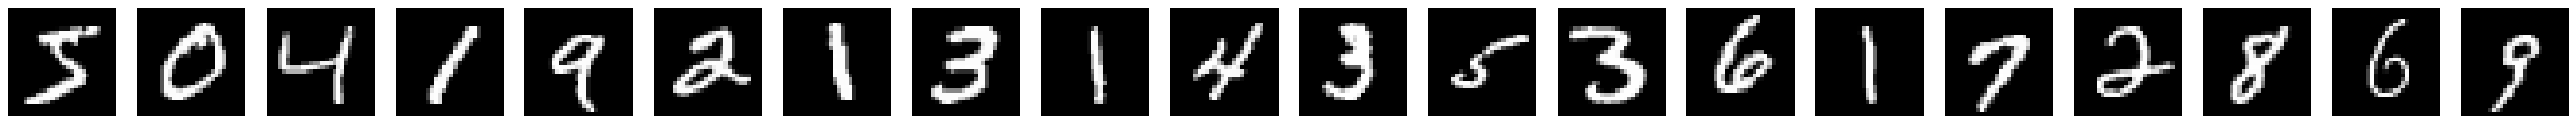

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))

num_images = 20
for i in range(num_images):
    row = x_train[i]
    label = y_train[i]

    image = row.reshape(28,28)
    plt.subplot(1, num_images, i+1)
    plt.axis('off')
    plt.imshow(image, cmap='gray')

# Verificando se está normalizado

In [8]:
x_train.min()

0.0

In [9]:
x_train.max()

1.0

In [10]:
x_valid.min()

0.0

In [11]:
x_valid.max()

1.0

In [12]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [13]:
print(y_valid)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Construindo a CNN

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu",
                 input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=10, activation="softmax"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 75)        750       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 75)        300       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 75)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 50)        2

#Compilando

In [16]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

#Treinando

In [17]:
history = model.fit(x_train, y_train,
          batch_size=128,
          epochs=20,
          verbose=1,
          validation_data=(x_valid, y_valid))

score = model.evaluate(x_valid, y_valid, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
469/469 [==============================] - 21s 16ms/step - loss: 0.1577 - accuracy: 0.9524 - val_loss: 0.5604 - val_accuracy: 0.8047
Epoch 2/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0500 - accuracy: 0.9848 - val_loss: 0.0319 - val_accuracy: 0.9898
Epoch 3/20
469/469 [==============================] - 5s 12ms/step - loss: 0.0364 - accuracy: 0.9887 - val_loss: 0.0492 - val_accuracy: 0.9847
Epoch 4/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0289 - accuracy: 0.9910 - val_loss: 0.0446 - val_accuracy: 0.9856
Epoch 5/20
469/469 [==============================] - 7s 14ms/step - loss: 0.0250 - accuracy: 0.9922 - val_loss: 0.0505 - val_accuracy: 0.9839
Epoch 6/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0210 - accuracy: 0.9935 - val_loss: 0.0246 - val_accuracy: 0.9919
Epoch 7/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0177 - accuracy: 0.9945 - val_loss: 0.0253 - val_accuracy: 0.991

#Traçando gráficos de precisão e perda para visualização

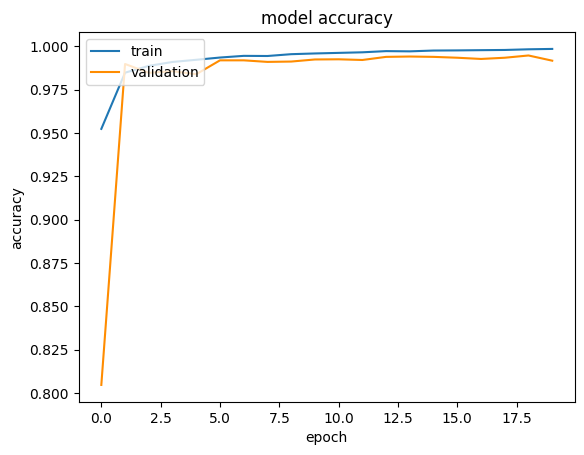

In [20]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"], "darkorange")
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

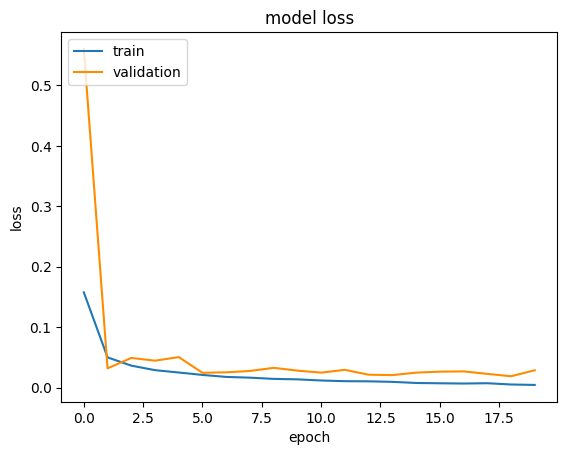

In [21]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"], "darkorange")
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()